In [12]:
import atexit
import numpy as np
import open3d as o3d
import pickle
import klampt
import numpy
import time
from klampt.math import se3
from motion_client import MotionClient
from klampt import vis, Geometry3D
from klampt.model import sensing
from motion import *
from OpenGL.GLUT import *
from threading import Thread
from sensorModule2 import Camera_Robot
mode = 'Kinematic'
components = []
robot = MotionClient(address = 'http://localhost:8080')
robot.startServer(mode = mode, components = components,codename = 'anthrax')
startup = True
res = robot.startup()

def add_terrain(world, path, T, name):
    geom = Geometry3D()
    geom.loadFile(path)
    geom.transform(T[0], T[1])
    item = world.makeTerrain(name)
    item.geometry().set(geom)
    return item

simrobot = Motion(mode = "Kinematic", codename="anthrax")
world = simrobot.getWorld()

initiating Kinematic controller
KinematicController: loading world
initiated Kinematic controller


In [13]:
add_terrain(world, "./data/cube.off", ([1, 0, 0, 0, 1, 0, 0, 0, 1], [2, 2, 0]), "test")
add_terrain(world, "./data/cube.off", ([1, 0, 0, 0, 1, 0, 0, 0, 1], [-2, 2, 0]), "test1")
add_terrain(world, "./data/cube.off", ([1, 0, 0, 0, 1, 0, 0, 0, 1], [2, -2, 0]), "test2")
add_terrain(world, "./data/cube.off", ([1, 0, 0, 0, 1, 0, 0, 0, 1], [-2, -2, 0]), "test3")

add_terrain(world, "./data/cube.off", ([1, 0, 0, 0, 1, 0, 0, 0, 1], [0, 5, 0]), "test")
add_terrain(world, "./data/cube.off", ([1, 0, 0, 0, 1, 0, 0, 0, 1], [5, 0, 0]), "test1")
add_terrain(world, "./data/cube.off", ([1, 0, 0, 0, 1, 0, 0, 0, 1], [0, -5, 0]), "test2")
add_terrain(world, "./data/cube.off", ([1, 0, 0, 0, 1, 0, 0, 0, 1], [-5, 0, 0]), "test3")

<klampt.robotsim.TerrainModel; proxy of <Swig Object of type 'TerrainModel *' at 0x7efda4341210> >

In [14]:
crobot = Camera_Robot(robot = robot,world = world)

INITIALIZING Qt BACKEND
Visualization thread closing and cleaning up Qt...


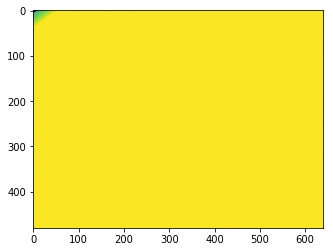

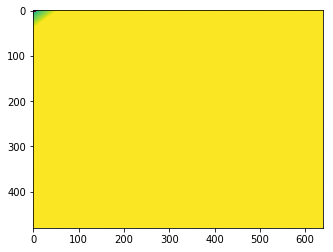

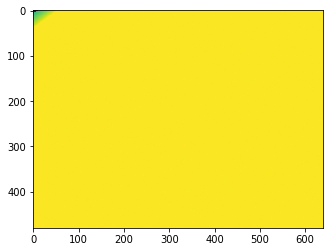

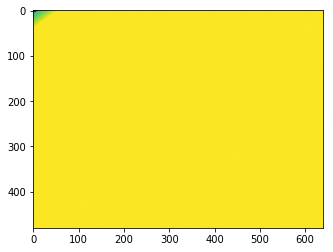

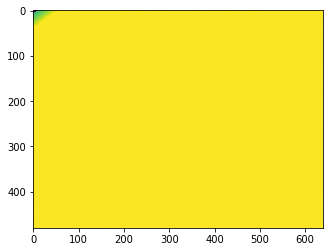

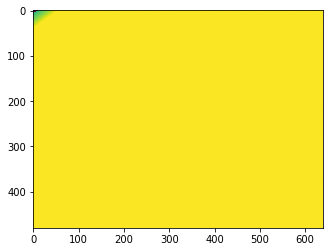

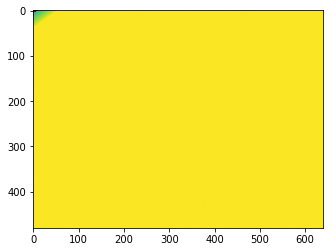

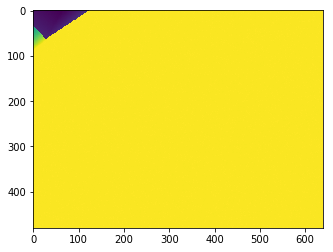

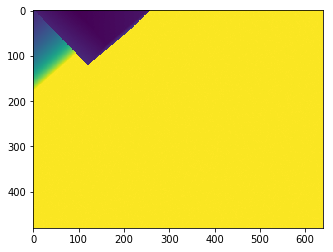

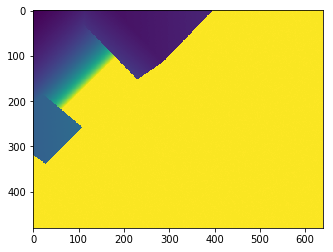

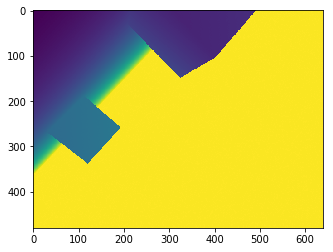

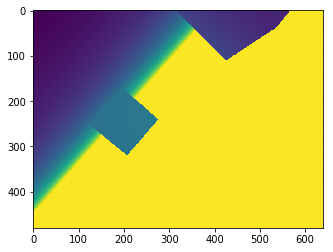

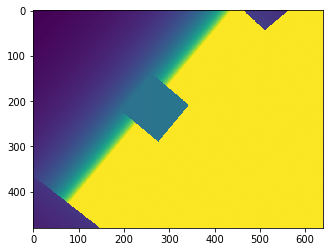

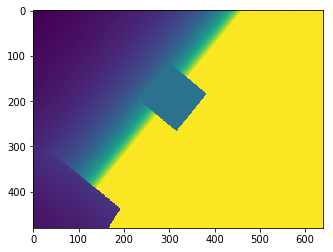

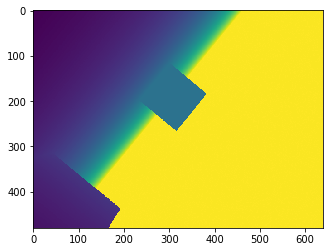

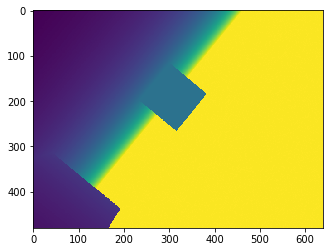

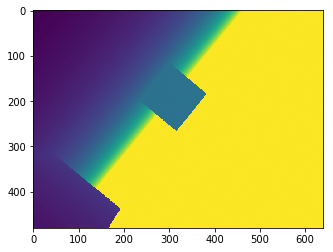

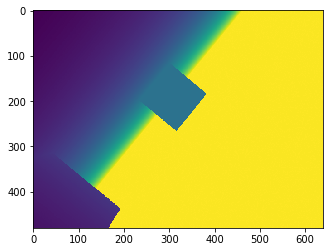

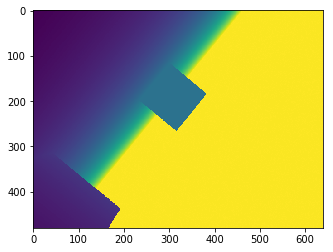

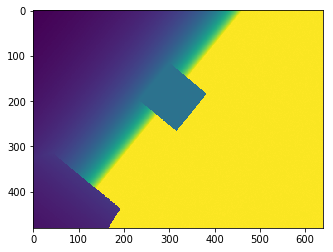

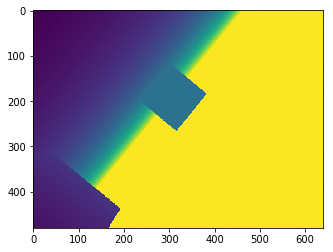

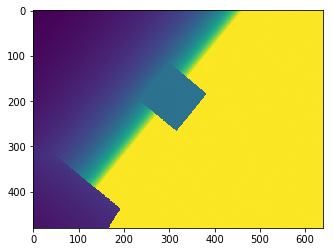

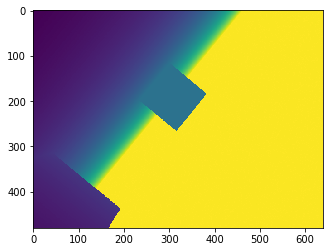

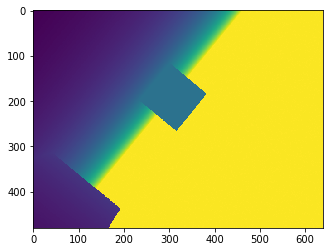

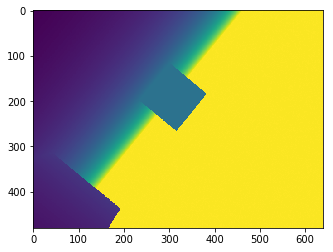

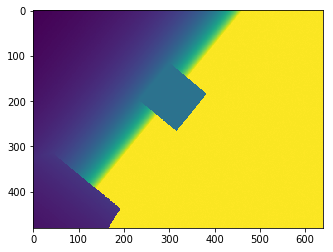

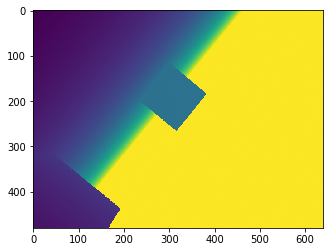

KeyboardInterrupt: 

In [15]:
while(True):
    a = crobot.get_rgbd_images()
    plt.imshow(a['realsense_left'][0])
    plt.show()
    time.sleep(1)

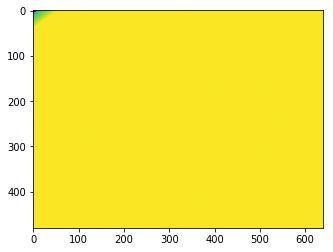

In [11]:
from matplotlib import pyplot as plt


In [ ]:
a['realsense_left'][1]